# Second mini project

## imports

In [182]:
#import
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

from PIL import Image, ImageDraw
from pylab import *
from math import sqrt
import random
import cv2


In [104]:
if not os.path.exists("Mp2_1"):
    os.makedirs("Mp2_1")

## First Question <br/>
Perceptron model

### data : import and split

In [ ]:
#download dataset and move data to mp2 folder
!gdown 1-KWQDy-8MkXX7s5JHyzkYUhEpN0YI1m1
!mv '/content/Perceptron.csv' '/content/Mp2_1'

Downloading...
From: https://drive.google.com/uc?id=1-KWQDy-8MkXX7s5JHyzkYUhEpN0YI1m1
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 33.7MB/s]


In [ ]:
#import data and display first 5
perceptron_data = pd.read_csv("/content/Mp2_1/Perceptron.csv")
perceptron_data.head()

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0


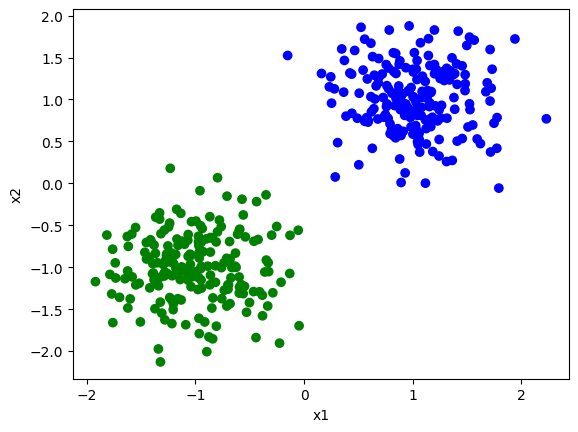

In [ ]:
#plot data
X, y = perceptron_data[['x1','x2']].values, perceptron_data[['y']].values
y = np.where(y==-1, 0, 1)
x1, x2 = X[:,0], X[:,1]
colors = ['b' if label == 0 else 'g' for label in y]
plt.scatter(x1, x2, c=colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=53)
print("#train = ", y_train.size)
print("#test = ", y_test.size)
print("persentage of instaneces with label 1 in train set = ", np.sum(y_train == 1)/ y_train.size*100)
print("persentage of instaneces with label 1 in test set = ", np.sum(y_test == 1)/ y_test.size*100)

#train =  320
#test =  80
persentage of instaneces with label 1 in train set =  50.0
persentage of instaneces with label 1 in test set =  50.0


### Nuroun

Activation functions

In [ ]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def step(x):
    return np.heaviside(x, 0)

loss functions

In [ ]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [ ]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

neuron class

In [ ]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1,threshold=0, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.threshold = threshold
        self.verbose = verbose


    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b + self.threshold
        y_hat = y_hat if self.af is None else (self.af(y_hat))
        return y_hat

    def decision_function(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b +  self.threshold
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            #model
            y_hat = self.predict(x)
            #loss
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            #grad
            self.gradient(x, y, y_hat)
            #optimize
            self.gradient_descent()
            #print results
            if self.verbose & (i % 40 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        af_name = self.af.__name__ if self.af is not None else None
        loss_fn_name = self.loss_fn.__name__ if self.loss_fn is not None else None
        return f'Neuron({self.in_features}, {self.threshold}, {af_name}, {loss_fn_name}, {self.n_iter}, {self.eta}, {self.verbose})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

### predict with 1 perseptron nurron

Iter=0, Loss=0.3202
Iter=40, Loss=0.02732
Iter=80, Loss=0.01094
Iter=120, Loss=0.006566
Iter=160, Loss=0.004666
Iter=200, Loss=0.003627
Iter=240, Loss=0.002978
Iter=280, Loss=0.002536
Iter=320, Loss=0.002216
Iter=360, Loss=0.001973


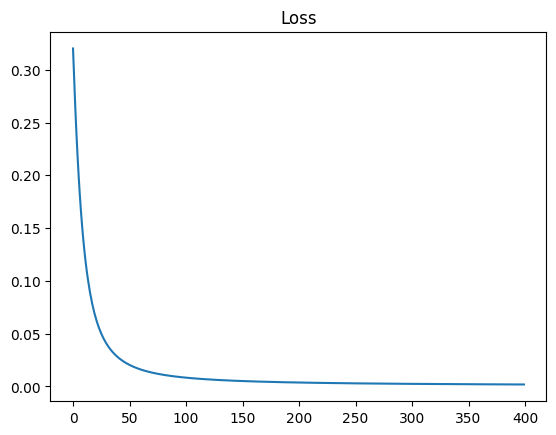

In [ ]:
perceptron_neuron1 = Neuron(in_features=2, af=sigmoid, n_iter=400)
perceptron_neuron1.fit(X_train, y_train)

plt.plot(perceptron_neuron1.loss_hist)
plt.title('Loss')
plt.show()

In [ ]:
#desision boundry
def desision_boundry(X, y, perceptron_neuron):
  x1_min, x2_min = X.min(0) -1
  x1_max, x2_max = X.max(0) +1
  x1_min, x2_min
  x1, x2 = X[:,0], X[:,1]

  n = 100
  x1r = np.linspace(x1_min, x1_max, n)
  x2r = np.linspace(x2_min, x2_max, n)
  x1m , x2m = np.meshgrid(x1r,x2r)

  xm = np.stack((x1m.flatten() , x2m.flatten()), axis=1)
  ym = perceptron_neuron.decision_function(xm)

  y_hat = perceptron_neuron.predict(X)
  y_hat = np.where(y_hat<0.5, 0, 1)
  color = ['b' if (label == 0 and pred == 0) else
          ('g' if (label == 1 and pred == 1) else 'r') for label, pred in zip(y, y_hat)]
  plt.scatter(x1, x2, c=color)
  plt.contour(x1m, x2m, ym.reshape(x1m.shape), levels=[-1, 0, 1])
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title('Decision Region of Perceptron')
  legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', label='Class 1'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', label='Class 0')]
  plt.legend(handles=legend_elements, loc='upper left')
  plt.show()

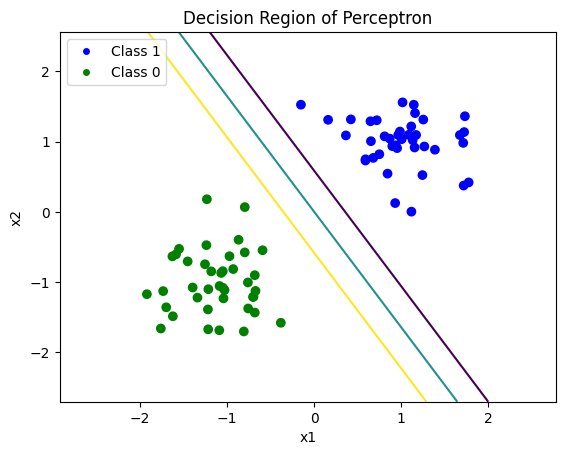

In [ ]:
desision_boundry(X_test, y_test, perceptron_neuron1)

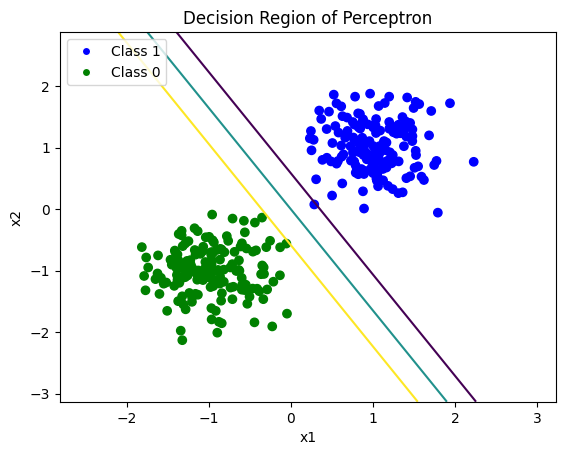

In [ ]:
desision_boundry(X_train, y_train, perceptron_neuron1)

### effect of threshold

Iter=0, Loss=0.4999
Iter=40, Loss=0.4462
Iter=80, Loss=0.1566


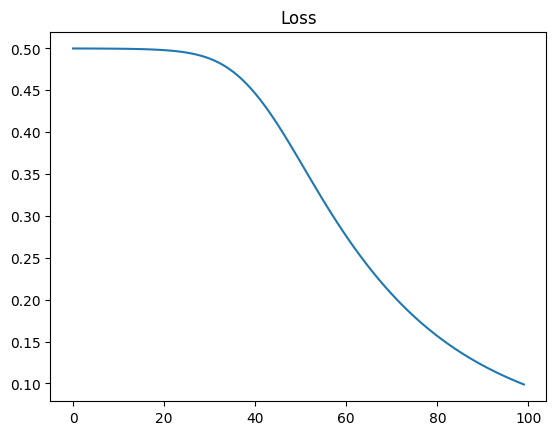

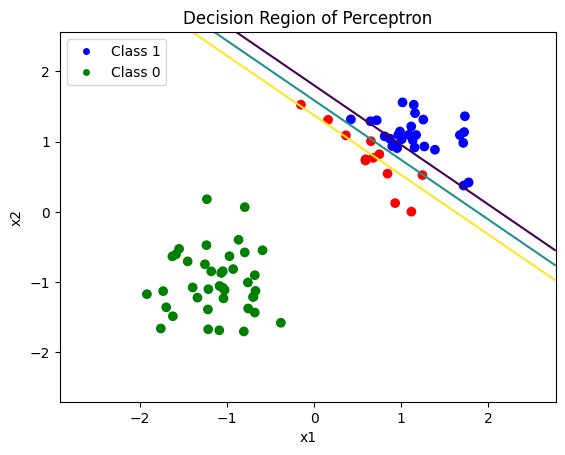

In [ ]:
#thresh hold of 10
perceptron_neuron2 = Neuron(in_features=2, af=sigmoid, n_iter=100, threshold=10)
perceptron_neuron2.fit(X_train, y_train)

plt.plot(perceptron_neuron2.loss_hist)
plt.title('Loss')
plt.show()

desision_boundry(X_test, y_test, perceptron_neuron2)

Iter=0, Loss=0.5
Iter=40, Loss=0.4737
Iter=80, Loss=0.1442
Iter=120, Loss=0.05179
Iter=160, Loss=0.02914
Iter=200, Loss=0.02001
Iter=240, Loss=0.01524
Iter=280, Loss=0.01235
Iter=320, Loss=0.01043
Iter=360, Loss=0.00907
Iter=400, Loss=0.00805
Iter=440, Loss=0.007258
Iter=480, Loss=0.006623


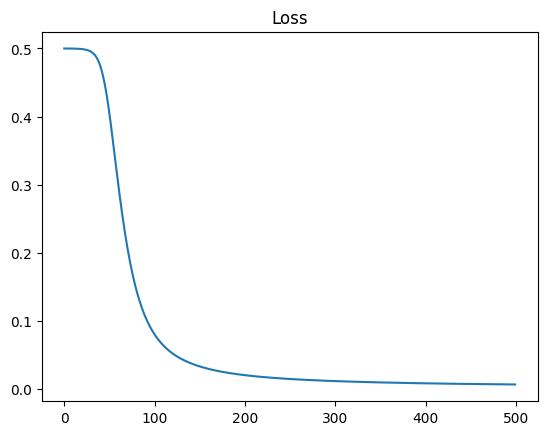

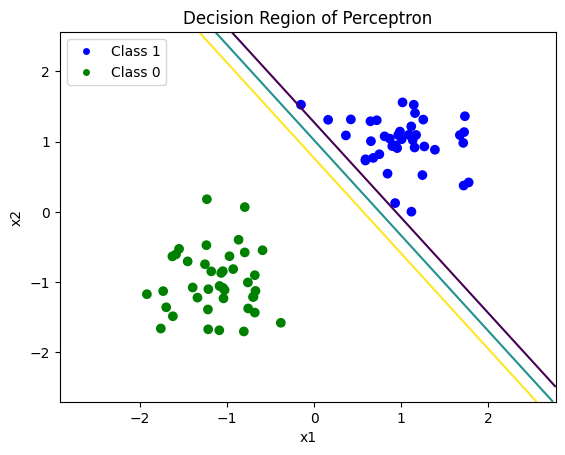

In [ ]:
perceptron_neuron3 = Neuron(in_features=2, af=sigmoid, n_iter=500, threshold=10)
perceptron_neuron3.fit(X_train, y_train)

plt.plot(perceptron_neuron3.loss_hist)
plt.title('Loss')
plt.show()

desision_boundry(X_test, y_test, perceptron_neuron3)

##Second Question<br/>
muculloch pitts

In [ ]:
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [ ]:
def twobitMul(input):

  neur3 = McCulloch_Pitts_neuron([0, 1 , 0, 1] , 2)

  neur21 = McCulloch_Pitts_neuron([-1, 1, 1, 0] , 2)
  neur22 = McCulloch_Pitts_neuron([0, 1, 1, -1] , 2)
  neur23 = McCulloch_Pitts_neuron([1, 0, -1, 1] , 2)
  neur24 = McCulloch_Pitts_neuron([1, -1 ,0, 1] , 2)
  neur2 = McCulloch_Pitts_neuron([1, 1 ,1, 1] , 1)

  neur11 = McCulloch_Pitts_neuron([1, 0, 1, -1] , 2)
  neur12 = McCulloch_Pitts_neuron([1, -1, 1, 0] , 2)
  neur1 = McCulloch_Pitts_neuron([1, 1] , 1)


  neur0 = McCulloch_Pitts_neuron([1, 1 , 1, 1] , 4)

  f3 = neur3.model(np.array([input[0], input[1], input[2], input[3]]))

  f21 = neur21.model(np.array([input[0], input[1], input[2], input[3]]))
  f22 = neur22.model(np.array([input[0], input[1], input[2], input[3]]))
  f23 = neur23.model(np.array([input[0], input[1], input[2], input[3]]))
  f24 = neur24.model(np.array([input[0], input[1], input[2], input[3]]))
  f2 = neur2.model(np.array([f21, f22, f23, f24]))

  f11 = neur11.model(np.array([input[0], input[1], input[2], input[3]]))
  f12 = neur12.model(np.array([input[0], input[1], input[2], input[3]]))
  f1 = neur1.model(np.array([f11, f12]))

  f0 = neur0.model(np.array([input[0], input[1], input[2], input[3]]))

  return list([f0, f1, f2, f3])

In [ ]:
import itertools

input = [1, 0]
X = list(itertools.product(input, input, input,input))

print((X))

[(1, 1, 1, 1), (1, 1, 1, 0), (1, 1, 0, 1), (1, 1, 0, 0), (1, 0, 1, 1), (1, 0, 1, 0), (1, 0, 0, 1), (1, 0, 0, 0), (0, 1, 1, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 1, 0, 0), (0, 0, 1, 1), (0, 0, 1, 0), (0, 0, 0, 1), (0, 0, 0, 0)]


In [ ]:
for i in X:
    res = twobitMul(i)
    print("x = ", i , "multply", str(res) )

x =  (1, 1, 1, 1) multply [1, 0, 0, 1]
x =  (1, 1, 1, 0) multply [0, 1, 1, 0]
x =  (1, 1, 0, 1) multply [0, 0, 1, 1]
x =  (1, 1, 0, 0) multply [0, 0, 0, 0]
x =  (1, 0, 1, 1) multply [0, 1, 1, 0]
x =  (1, 0, 1, 0) multply [0, 1, 0, 0]
x =  (1, 0, 0, 1) multply [0, 0, 1, 0]
x =  (1, 0, 0, 0) multply [0, 0, 0, 0]
x =  (0, 1, 1, 1) multply [0, 0, 1, 1]
x =  (0, 1, 1, 0) multply [0, 0, 1, 0]
x =  (0, 1, 0, 1) multply [0, 0, 0, 1]
x =  (0, 1, 0, 0) multply [0, 0, 0, 0]
x =  (0, 0, 1, 1) multply [0, 0, 0, 0]
x =  (0, 0, 1, 0) multply [0, 0, 0, 0]
x =  (0, 0, 0, 1) multply [0, 0, 0, 0]
x =  (0, 0, 0, 0) multply [0, 0, 0, 0]


In [ ]:
def twobitMul2(input):

  neur3 = McCulloch_Pitts_neuron([1 , 1] , 2)

  neur21 = McCulloch_Pitts_neuron([-1, 1, 1] , 2)
  neur22 = McCulloch_Pitts_neuron([1, 1, -1] , 2)
  neur23 = McCulloch_Pitts_neuron([1, -1, 1] , 2)
  neur24 = McCulloch_Pitts_neuron([1, -1 , 1] , 2)
  neur2 = McCulloch_Pitts_neuron([1, 1 ,1, 1] , 1)

  neur11 = McCulloch_Pitts_neuron([1, 1, -1] , 2)
  neur12 = McCulloch_Pitts_neuron([1, -1, 1] , 2)
  neur1 = McCulloch_Pitts_neuron([1, 1] , 1)


  neur0 = McCulloch_Pitts_neuron([1, 1 , 1, 1] , 4)

  f3 = neur3.model(np.array([input[1],input[3]]))

  f21 = neur21.model(np.array([input[0], input[1], input[2]]))
  f22 = neur22.model(np.array([input[1], input[2], input[3]]))
  f23 = neur23.model(np.array([input[0], input[2], input[3]]))
  f24 = neur24.model(np.array([input[0], input[1], input[3]]))
  f2 = neur2.model(np.array([f21, f22, f23, f24]))

  f11 = neur11.model(np.array([input[0], input[2], input[3]]))
  f12 = neur12.model(np.array([input[0], input[1], input[2]]))
  f1 = neur1.model(np.array([f11, f12]))

  f0 = neur0.model(np.array([input[0], input[1], input[2], input[3]]))

  return list([f0, f1, f2, f3])

In [ ]:
for i in X:
    res = twobitMul2(i)
    print("x = ", i , "multply", str(res) )

x =  (1, 1, 1, 1) multply [1, 0, 0, 1]
x =  (1, 1, 1, 0) multply [0, 1, 1, 0]
x =  (1, 1, 0, 1) multply [0, 0, 1, 1]
x =  (1, 1, 0, 0) multply [0, 0, 0, 0]
x =  (1, 0, 1, 1) multply [0, 1, 1, 0]
x =  (1, 0, 1, 0) multply [0, 1, 0, 0]
x =  (1, 0, 0, 1) multply [0, 0, 1, 0]
x =  (1, 0, 0, 0) multply [0, 0, 0, 0]
x =  (0, 1, 1, 1) multply [0, 0, 1, 1]
x =  (0, 1, 1, 0) multply [0, 0, 1, 0]
x =  (0, 1, 0, 1) multply [0, 0, 0, 1]
x =  (0, 1, 0, 0) multply [0, 0, 0, 0]
x =  (0, 0, 1, 1) multply [0, 0, 0, 0]
x =  (0, 0, 1, 0) multply [0, 0, 0, 0]
x =  (0, 0, 0, 1) multply [0, 0, 0, 0]
x =  (0, 0, 0, 0) multply [0, 0, 0, 0]


## 3rd Q

### 1. data and functions


In [105]:
if not os.path.exists("Mp2_1"):
    os.makedirs("Mp2_1")

!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS

!mv '/content/PersianData.zip' '/content/Mp2_1'
!unzip /content/Mp2_1/PersianData.zip -d /content/Mp2_1


Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 16.3MB/s]
Archive:  /content/Mp2_1/PersianData.zip
replace /content/Mp2_1/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Mp2_1/1.jpg    
replace /content/Mp2_1/2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Mp2_1/2.jpg    
replace /content/Mp2_1/3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Mp2_1/3.jpg    
replace /content/Mp2_1/4.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Mp2_1/4.jpg    
replace /content/Mp2_1/5.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Mp2_1/5.jpg    


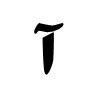

In [106]:
image = Image.open("/content/Mp2_1/1.jpg")
image

In [107]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

In [108]:
def convertImageToBinary2(path, threshold=127):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.
        threshold (int, optional): The threshold value used for binarizing. Default is 127.

    Returns:
        numpy.ndarray: A binary representation of the image where
        white is represented by -1 and black is represented by 1.
    """
    # Read the image in grayscale.
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Apply binarization using the threshold.
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

    # Convert to binary representation as per the requirement.
    binary_representation = np.where(binary_image > threshold, -1, 1)

    return binary_representation

In [109]:
def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/Mp2_1/1.jpg",
        "/content/Mp2_1/2.jpg",
        "/content/Mp2_1/3.jpg",
        "/content/Mp2_1/4.jpg",
        "/content/Mp2_1/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 100

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()

Noisy image for /content/Mp2_1/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/Mp2_1/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/Mp2_1/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/Mp2_1/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/Mp2_1/5.jpg generated and saved as /content/noisy5.jpg


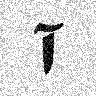

In [110]:
image = Image.open("/content/noisy1.jpg")
image

In [111]:
def generate_noisy_images_opencv2():
    image_paths = [
        "/content/Mp2_1/1.jpg",
        "/content/Mp2_1/2.jpg",
        "/content/Mp2_1/3.jpg",
        "/content/Mp2_1/4.jpg",
        "/content/Mp2_1/5.jpg"
    ]

    for image_path in image_paths:
        image = cv2.imread(image_path)
        noisy_image = add_noise_with_opencv2(image, noise_factor)

        noisy_image_path = image_path.replace('/content/Mp2_1/', '/content/Mp2_1/noisy_')
        cv2.imwrite(noisy_image_path, noisy_image)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def add_noise_with_opencv2(image, noise_factor):
    # Generate random noise and add it to the image
    noise = np.random.randint(-noise_factor, noise_factor, size=image.shape, dtype=np.int32)
    noisy_image = cv2.add(image, noise, dtype=cv2.CV_8U)

    return noisy_image


noise_factor = 100
generate_noisy_images_opencv2()

Noisy image for /content/Mp2_1/1.jpg generated and saved as /content/Mp2_1/noisy_1.jpg
Noisy image for /content/Mp2_1/2.jpg generated and saved as /content/Mp2_1/noisy_2.jpg
Noisy image for /content/Mp2_1/3.jpg generated and saved as /content/Mp2_1/noisy_3.jpg
Noisy image for /content/Mp2_1/4.jpg generated and saved as /content/Mp2_1/noisy_4.jpg
Noisy image for /content/Mp2_1/5.jpg generated and saved as /content/Mp2_1/noisy_5.jpg


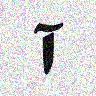

In [112]:
image = Image.open("/content/Mp2_1/noisy_1.jpg")
image

### 2. Haming

In [113]:
def show(matrix):
    """
    Display a matrix in a formatted manner.

    Args:
        matrix (list of lists): The matrix to be displayed.
    """
    for j in range(len(matrix)):
        for i in range(len(matrix[0])):
            print("{:.3f}".format(matrix[j][i]), end=" ")
        print(sep="")

def change(vector, a, b):
    """
    Transform a vector into a matrix of specified dimensions.

    Args:
        vector (list): The vector to be transformed.
        a (int): The number of columns in the resulting matrix.
        b (int): The number of rows in the resulting matrix.

    Returns:
        list of lists: The transformed matrix.
    """
    matrix = [[0 for j in range(a)] for i in range(b)]
    k = 0
    j = 0
    while k < b:
        i = 0
        while i < a:
            matrix[k][i] = vector[j]
            j += 1
            i += 1
        k += 1
    return matrix

def product(matrix, vector, T):
    """
    Multiply a matrix by a vector.

    Args:
        matrix (list of lists): The matrix to be multiplied.
        vector (list): The vector to be multiplied.
        T (float): The threshold parameter for the activation function.

    Returns:
        list: The resulting vector after multiplication.
    """
    result_vector = []
    for i in range(len(matrix)):
        x = 0
        for j in range(len(vector)):
            x = x + matrix[i][j] * vector[j]
        result_vector.append((x + T))
    return result_vector

def action(vector, T, Emax):
    """
    Activation function to process a vector.

    Args:
        vector (list): The input vector to be processed.
        T (float): The threshold parameter for the activation function.
        Emax (float): The maximum allowable value for the difference in output vectors between consecutive iterations.

    Returns:
        list: The output vector after activation.
    """
    result_vector = []
    for value in vector:
        if value <= 0:
            result_vector.append(0)
        elif 0 < value <= T:
            result_vector.append(Emax * value)
        elif value > T:
            result_vector.append(T)
    return result_vector

def mysum(vector, j):
    """
    Calculate the sum of vector values excluding the element at index j.

    Args:
        vector (list): The input vector.
        j (int): The index of the element to be excluded from the sum.

    Returns:
        float: The sum of vector values with the element at index j excluded.
    """
    p = 0
    total_sum = 0
    while p < len(vector):
        if p != j:
            total_sum = total_sum + vector[p]
        p += 1
    return total_sum

def norm(vector, p):
    """
    Calculate the difference between two vectors and compute the norm of the resulting vector.

    Args:
        vector (list): The first vector.
        p (list): The second vector for subtraction.

    Returns:
        float: The Euclidean norm of the difference between the two vectors.
    """
    difference = []
    for i in range(len(vector)):
        difference.append(vector[i] - p[i])
    sum = 0
    for element in difference:
        sum += element * element
    return sqrt(sum)


Streaming output truncated to the last 5000 lines.
x4220: -0.500, y4220: -0.500
x4221: -0.500, y4221: -0.500
x4222: -0.500, y4222: -0.500
x4223: -0.500, y4223: -0.500
x4224: -0.500, y4224: -0.500
x4225: -0.500, y4225: -0.500
x4226: -0.500, y4226: -0.500
x4227: -0.500, y4227: -0.500
x4228: -0.500, y4228: -0.500
x4229: -0.500, y4229: -0.500
x4230: -0.500, y4230: -0.500
x4231: -0.500, y4231: -0.500
x4232: -0.500, y4232: -0.500
x4233: -0.500, y4233: -0.500
x4234: -0.500, y4234: -0.500
x4235: -0.500, y4235: -0.500
x4236: -0.500, y4236: -0.500
x4237: -0.500, y4237: -0.500
x4238: -0.500, y4238: -0.500
x4239: -0.500, y4239: -0.500
x4240: -0.500, y4240: -0.500
x4241: -0.500, y4241: -0.500
x4242: -0.500, y4242: -0.500
x4243: -0.500, y4243: -0.500
x4244: -0.500, y4244: -0.500
x4245: -0.500, y4245: -0.500
x4246: -0.500, y4246: -0.500
x4247: -0.500, y4247: -0.500
x4248: 0.500, y4248: -0.500
x4249: 0.500, y4249: -0.500
x4250: 0.500, y4250: -0.500
x4251: 0.500, y4251: -0.500
x4252: 0.500, y4252: -0.5

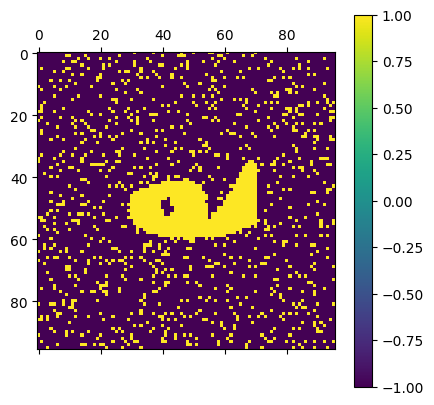

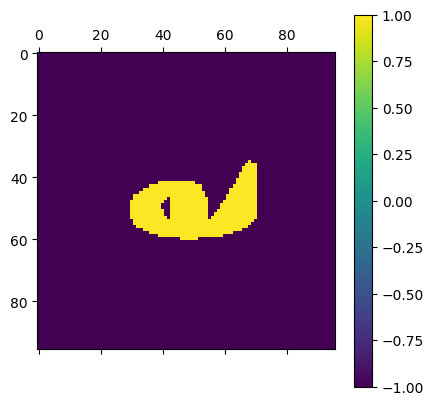

In [114]:
# Define the path to the input image
IMAGE_PATH = "/content/noisy5.jpg"

# List of paths to example images
path = [
    "/content/Mp2_1/1.jpg",
    "/content/Mp2_1/2.jpg",
    "/content/Mp2_1/3.jpg",
    "/content/Mp2_1/4.jpg",
    "/content/Mp2_1/5.jpg"
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
for idx, output_vector in enumerate(y):
    print(f'Iteration {idx + 1}:', *output_vector)
    print('Weights (x, y):')
    for j in range(len(x[0])):
        print(f'x{j}: {w[0][j]:.3f}, y{j}: {w[1][j]:.3f}')
    print('Error:', norm(y[idx], p))
    print()

print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()

noisy1.jpg
Output Vectors Table:
0.008 0.007 0.007 0.008 0.008 
0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 
Last Output Vector: 1.0339200000000002e-15 0 0 2.6927999999999907e-16 3.830399999999991e-16
The highest positive output value is associated with class 1


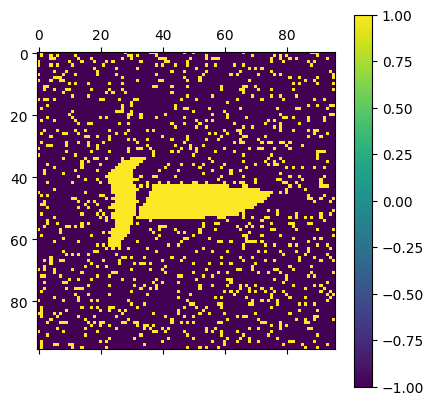

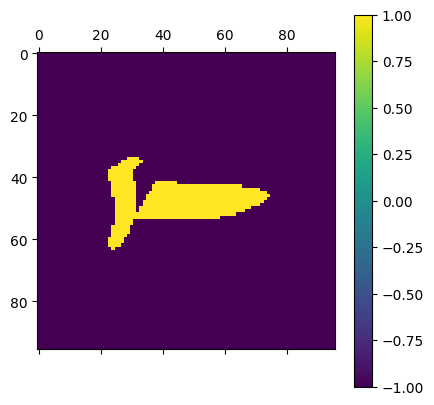

In [115]:
# Define the path to the input image
IMAGE_PATH = "/content/noisy1.jpg"

# List of paths to example images
path = [
    "/content/Mp2_1/1.jpg",
    "/content/Mp2_1/2.jpg",
    "/content/Mp2_1/3.jpg",
    "/content/Mp2_1/4.jpg",
    "/content/Mp2_1/5.jpg"
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()

changing noise factor to 400

Noisy image for /content/Mp2_1/1.jpg generated and saved as /content/Mp2_1/noisy_1.jpg
Noisy image for /content/Mp2_1/2.jpg generated and saved as /content/Mp2_1/noisy_2.jpg
Noisy image for /content/Mp2_1/3.jpg generated and saved as /content/Mp2_1/noisy_3.jpg
Noisy image for /content/Mp2_1/4.jpg generated and saved as /content/Mp2_1/noisy_4.jpg
Noisy image for /content/Mp2_1/5.jpg generated and saved as /content/Mp2_1/noisy_5.jpg


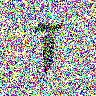

In [116]:
noise_factor = 400
generate_noisy_images_opencv2()
image = Image.open("/content/Mp2_1/noisy_1.jpg")
image

noisy_1.jpg
Output Vectors Table:
0.005 0.005 0.005 0.005 0.005 
0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 
Last Output Vector: 4.2427999999999987e-16 5.4199999999999456e-17 1.4779999999999983e-16 1.1180000000000038e-16 1.9099999999999943e-16
The highest positive output value is associated with class 1


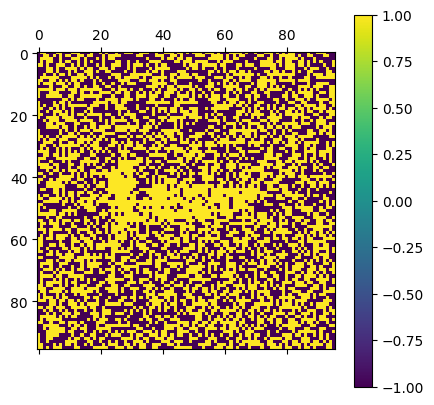

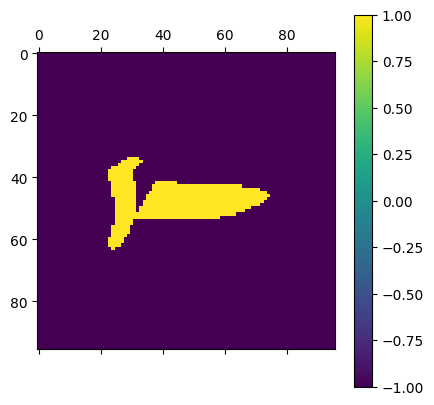

In [117]:
# Define the path to the input image
IMAGE_PATH = "/content/Mp2_1/noisy_1.jpg"

# List of paths to example images
path = [
    "/content/Mp2_1/1.jpg",
    "/content/Mp2_1/2.jpg",
    "/content/Mp2_1/3.jpg",
    "/content/Mp2_1/4.jpg",
    "/content/Mp2_1/5.jpg"
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()

noise factor 800

Noisy image for /content/Mp2_1/1.jpg generated and saved as /content/Mp2_1/noisy_1.jpg
Noisy image for /content/Mp2_1/2.jpg generated and saved as /content/Mp2_1/noisy_2.jpg
Noisy image for /content/Mp2_1/3.jpg generated and saved as /content/Mp2_1/noisy_3.jpg
Noisy image for /content/Mp2_1/4.jpg generated and saved as /content/Mp2_1/noisy_4.jpg
Noisy image for /content/Mp2_1/5.jpg generated and saved as /content/Mp2_1/noisy_5.jpg


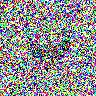

In [118]:
noise_factor = 800
generate_noisy_images_opencv2()
image = Image.open("/content/Mp2_1/noisy_2.jpg")
image

noisy_2.jpg
Output Vectors Table:
0.004 0.004 0.004 0.004 0.004 
0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 
Last Output Vector: 2.2119999999999608e-17 3.547600000000001e-16 2.5251999999999986e-16 8.979999999999994e-17 4.2280000000000086e-17
The highest positive output value is associated with class 2


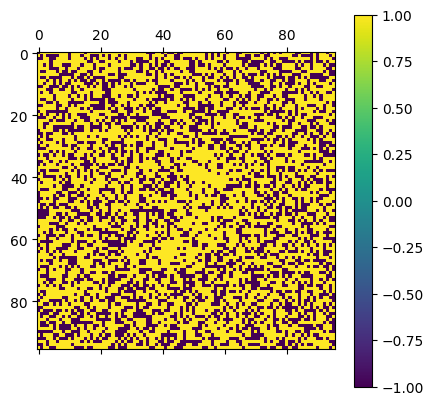

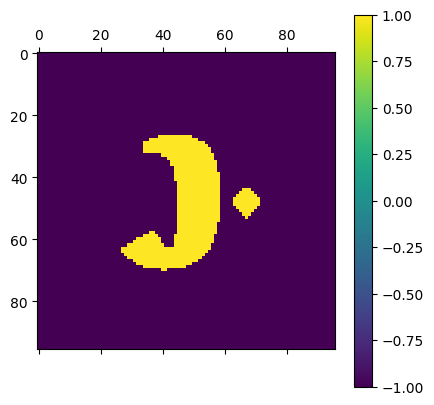

In [119]:
# Define the path to the input image
IMAGE_PATH = "/content/Mp2_1/noisy_2.jpg"

# List of paths to example images
path = [
    "/content/Mp2_1/1.jpg",
    "/content/Mp2_1/2.jpg",
    "/content/Mp2_1/3.jpg",
    "/content/Mp2_1/4.jpg",
    "/content/Mp2_1/5.jpg"
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()

noise factor 1000

Noisy image for /content/Mp2_1/1.jpg generated and saved as /content/Mp2_1/noisy_1.jpg
Noisy image for /content/Mp2_1/2.jpg generated and saved as /content/Mp2_1/noisy_2.jpg
Noisy image for /content/Mp2_1/3.jpg generated and saved as /content/Mp2_1/noisy_3.jpg
Noisy image for /content/Mp2_1/4.jpg generated and saved as /content/Mp2_1/noisy_4.jpg
Noisy image for /content/Mp2_1/5.jpg generated and saved as /content/Mp2_1/noisy_5.jpg


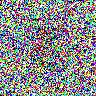

In [120]:
noise_factor = 1000
generate_noisy_images_opencv2()
image = Image.open("/content/Mp2_1/noisy_3.jpg")
image

noisy_1.jpg
Output Vectors Table:
0.004 0.004 0.004 0.004 0.004 
0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 
Last Output Vector: 2.2328000000000005e-16 1.1815999999999983e-16 2.0887999999999958e-16 6.920000000000023e-17 1.1671999999999956e-16
The highest positive output value is associated with class 1


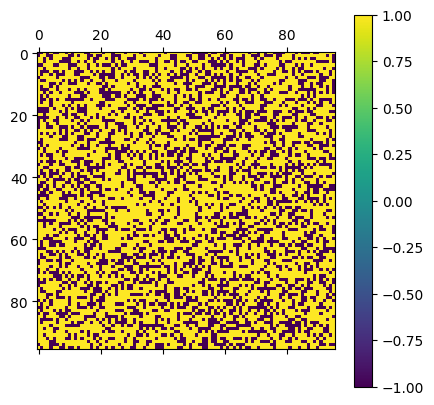

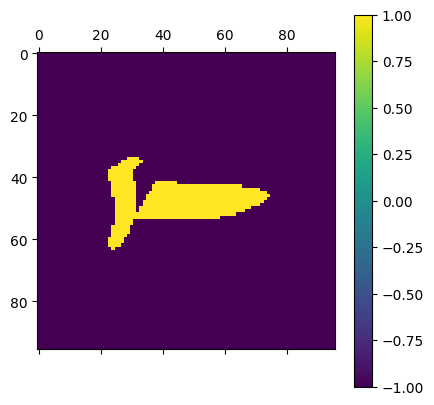

In [121]:
# Define the path to the input image
IMAGE_PATH = "/content/Mp2_1/noisy_1.jpg"

# List of paths to example images
path = [
    "/content/Mp2_1/1.jpg",
    "/content/Mp2_1/2.jpg",
    "/content/Mp2_1/3.jpg",
    "/content/Mp2_1/4.jpg",
    "/content/Mp2_1/5.jpg"
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()

### 3. missing points

In [133]:
def getNoisyBinaryImage3(input_path, output_path, num_missing_points, conversion_percentage):
    """
    Add noise to an image, generate missing points, and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
        num_missing_points (int): The number of missing points to generate.
        conversion_percentage (float): The percentage of black pixels to convert to white.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 5

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Convert some black pixels to white based on the conversion percentage.
            if (red, green, blue) == (0, 0, 0) and random.random() < conversion_percentage:
                red, green, blue = 255, 255, 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Generate missing points in the image.
    for _ in range(num_missing_points):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        draw.point((x, y), (255, 255, 255))  # Set the missing point to white

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw


def generateNoisyImages3():
    # List of image file paths
    image_paths = [
    "/content/Mp2_1/1.jpg",
    "/content/Mp2_1/2.jpg",
    "/content/Mp2_1/3.jpg",
    "/content/Mp2_1/4.jpg",
    "/content/Mp2_1/5.jpg"
]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        # Specify the number of missing points and conversion percentage here
        getNoisyBinaryImage3(image_path, noisy_image_path, num_missing_points=30000, conversion_percentage=0.1)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")


Noisy image for /content/Mp2_1/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/Mp2_1/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/Mp2_1/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/Mp2_1/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/Mp2_1/5.jpg generated and saved as /content/noisy5.jpg


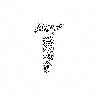

In [125]:
generateNoisyImages3()
image = Image.open("/content/noisy1.jpg")
image

noisy1.jpg
Output Vectors Table:
0.009 0.008 0.008 0.009 0.009 
0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 
Last Output Vector: 7.353600000000002e-16 1.1183999999999804e-16 0 4.5168e-16 4.4159999999999957e-16
The highest positive output value is associated with class 1


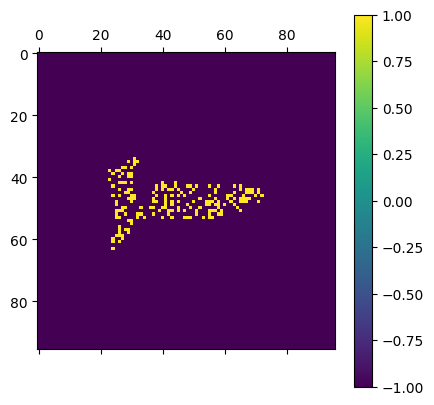

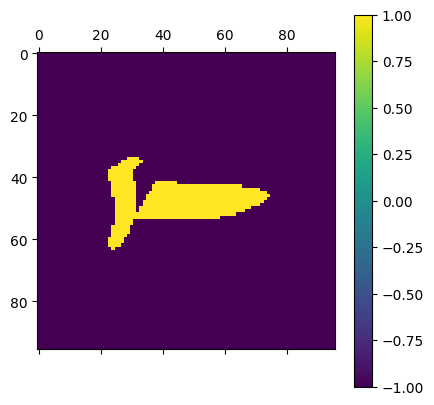

In [126]:
# Define the path to the input image
IMAGE_PATH = "/content/noisy1.jpg"

# List of paths to example images
path = [
    "/content/Mp2_1/1.jpg",
    "/content/Mp2_1/2.jpg",
    "/content/Mp2_1/3.jpg",
    "/content/Mp2_1/4.jpg",
    "/content/Mp2_1/5.jpg"
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()


num_missing_points=50000

Noisy image for /content/Mp2_1/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/Mp2_1/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/Mp2_1/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/Mp2_1/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/Mp2_1/5.jpg generated and saved as /content/noisy5.jpg


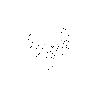

In [137]:
generateNoisyImages3()
image = Image.open("/content/noisy2.jpg")
image

noisy2.jpg
Output Vectors Table:
0.009 0.008 0.008 0.009 0.009 
0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 
Last Output Vector: 4.908400000000001e-16 2.59e-16 0 5.268399999999998e-16 4.5339999999999865e-16
The highest positive output value is associated with class 4


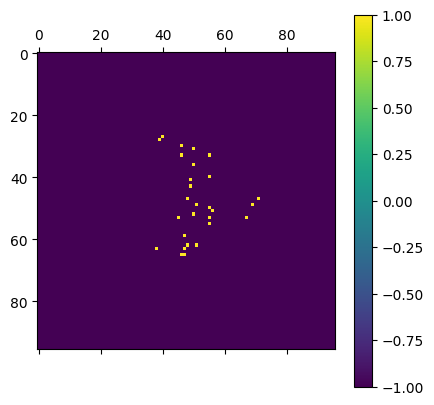

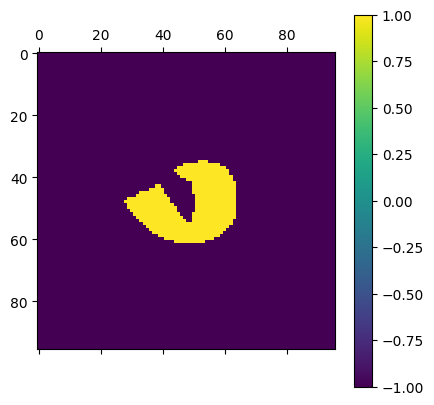

In [136]:
# Define the path to the input image
IMAGE_PATH = "/content/noisy2.jpg"

# List of paths to example images
path = [
    "/content/Mp2_1/1.jpg",
    "/content/Mp2_1/2.jpg",
    "/content/Mp2_1/3.jpg",
    "/content/Mp2_1/4.jpg",
    "/content/Mp2_1/5.jpg"
]

x = []  # Binary representations of example images
print(os.path.basename(IMAGE_PATH))

# Convert and store binary representations of example images
for i in path:
    x.append(convertImageToBinary(i))

y = convertImageToBinary(IMAGE_PATH)  # Binary representation of the input image
entr = y
k = len(x)  # Number of example images
a = 96  # Number of columns in the transformed matrix
b = 96  # Number of rows in the transformed matrix
entr = y
q = change(y, a, b)  # Transformation of the input image into a matrix
plt.matshow(q)
plt.colorbar()

m = len(x[0])
w = [[(x[i][j]) / 2 for j in range(m)] for i in range(k)]  # Weight matrix
T = m / 2  # Activation function threshold parameter
e = round(1 / len(x), 1)
E = [[0 for j in range(k)] for i in range(k)]  # Synaptic connection matrix
Emax = 0.000001  # Maximum allowable difference norm between output vectors in consecutive iterations
U = 1 / Emax

# Set values for the synaptic connection matrix
for i in range(k):
    for j in range(k):
        if j == i:
            E[i][j] = 1.0
        else:
            E[i][j] = -e

s = [product(w, y, T)]  # Initial output vector
p = action(s[0], U, Emax)
y = [p]
i = 0
j = []
p = [0 for j in range(len(s[0]))]

# Iterate until the difference norm is less than Emax
while norm(y[i], p) >= Emax:
    s.append([0 for j in range(len(s[0]))])
    for j in range(len(s[0])):
        s[i + 1][j] = y[i][j] - e * mysum(y[i], j)
    y.append((action(s[i + 1], U, Emax)))
    i += 1
    p = y[i - 1]

print('Output Vectors Table:')
show(y)
print('Last Output Vector:', *y[len(y) - 1])

# Determine the class with the highest output value
result_index = y[len(y) - 1].index(max(y[len(y) - 1])) + 1

if max(y[len(y) - 1]) == 0:
    print("The Hamming network cannot make a preference between classes.")
    print("In the case of a small number of input characteristics, the network may not be able to classify the image.")
    plt.show()
    exit()
else:
    q = change(x[result_index - 1], a, b)
    print('The highest positive output value is associated with class', result_index)
    plt.matshow(q)
    plt.colorbar()
    plt.show()


## 4th Q


### 1. Read .`csv` file and then call the `.info` method from Pandas. After that display the number of data that are NaN for each column

In [ ]:
#import data

!gdown 1T5OSII1eHNEgmeaVqiEX-az--xIdnmes
!mv '/content/housedata.zip' '/content/Mp2_1'
!unzip /content/Mp2_1/housedata.zip -d /content/Mp2_1
housedata = pd.read_csv("/content/Mp2_1/data.csv")
housedata.head()


Downloading...
From: https://drive.google.com/uc?id=1T5OSII1eHNEgmeaVqiEX-az--xIdnmes
To: /content/housedata.zip
100% 442k/442k [00:00<00:00, 73.1MB/s]
Archive:  /content/Mp2_1/housedata.zip
replace /content/Mp2_1/data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Mp2_1/data.csv  
replace /content/Mp2_1/data.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Mp2_1/data.dat  
replace /content/Mp2_1/output.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Mp2_1/output.csv  


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
housedata.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### 2. corolation matrix

In [ ]:
housedata = housedata.drop(['country'], axis=1)
housedata = housedata.drop(['street'], axis=1)

In [ ]:
# Extract the "Date" column
statezip = housedata["statezip"]

# Count the occurrences of each unique car name
# Data.value_counts()

# Split the date into lists year and month using a - as the delimiter and take the first two words
zipcode = []
for statezip in statezip:
    code = statezip.split()[1]
    zipcode.append(code)

zipcode = pd.DataFrame(zipcode)
zipcode
housedata.insert(16, "Zipcode", zipcode[0])
housedata = housedata.drop(['statezip'], axis=1)

housedata["Zipcode"]

0       98133
1       98119
2       98042
3       98008
4       98052
        ...  
4595    98133
4596    98007
4597    98059
4598    98178
4599    98042
Name: Zipcode, Length: 4600, dtype: object

In [ ]:
# Extract the "street" column
city = housedata["city"]
# Count the occurrences of each unique street
print(city.value_counts())

dummy = ['city']
df2 = pd.get_dummies(housedata, columns=dummy, drop_first=True)

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [ ]:
# Calculate the correlation between columns and 'price', then sort them in descending order
correlation_matrix = df2.corr()['price'].sort_values(ascending=False)
correlation_matrix

<ipython-input-54-ce6aa7a63713>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()['price'].sort_values(ascending=False)


price                       1.000000
sqft_living                 0.430410
sqft_above                  0.367570
bathrooms                   0.327110
view                        0.228504
sqft_basement               0.210427
bedrooms                    0.200336
floors                      0.151461
city_Mercer Island          0.140007
waterfront                  0.135648
city_Bellevue               0.134828
city_Medina                 0.129795
city_Clyde Hill             0.066867
sqft_lot                    0.050451
city_Redmond                0.047612
city_Sammamish              0.047604
city_Kirkland               0.036375
city_Seattle                0.035642
condition                   0.034915
city_Yarrow Point           0.033640
yr_built                    0.021857
city_Newcastle              0.017201
city_Woodinville            0.016361
city_Issaquah               0.016139
city_Fall City              0.012220
city_Beaux Arts Village     0.005049
city_Preston                0.000388
c

<ipython-input-55-86ebc98da4ba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap="RdYlGn")


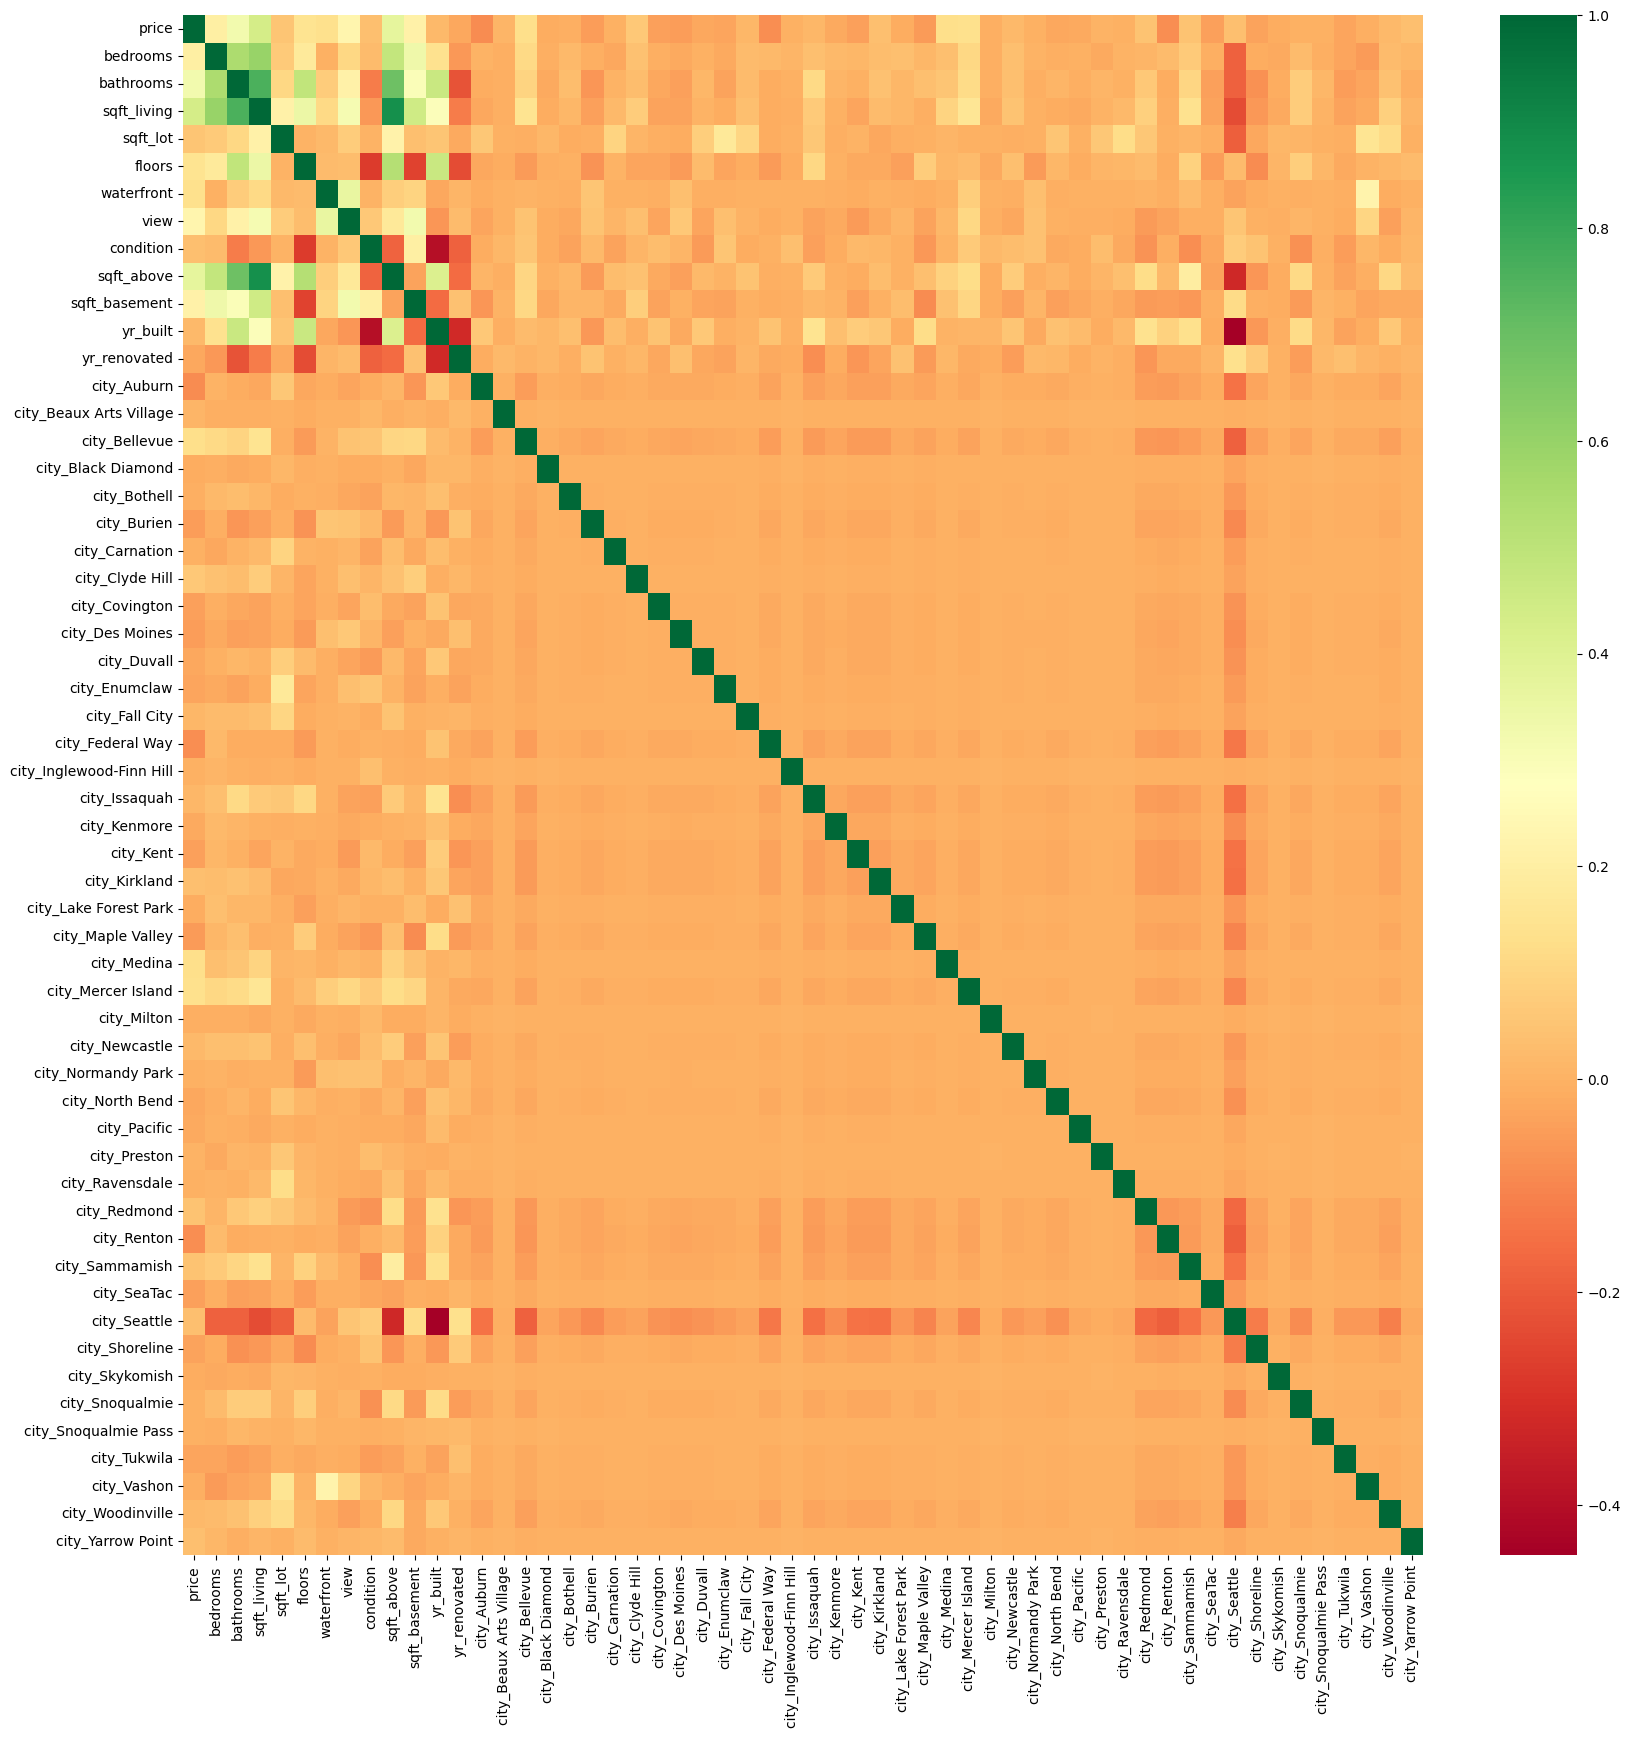

In [ ]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(), cmap="RdYlGn")
plt.show()

###3. Plot Distribution

In [ ]:
df2[['sqft_living']].shape

(4600, 1)

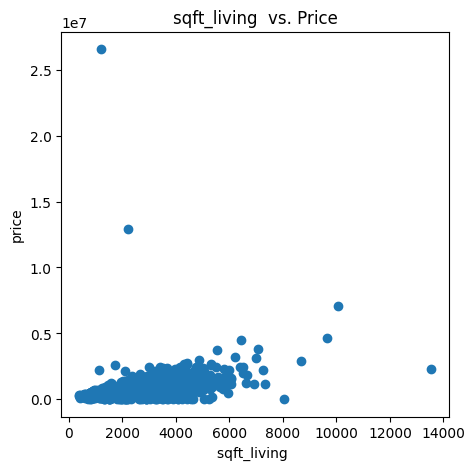

In [ ]:
# Create a scatter plot of sqft_living against price
plt.figure(figsize=(5, 5))
plt.scatter(x='sqft_living', y='price', data=df2)
plt.xlabel('sqft_living ')
plt.title('sqft_living  vs. Price')
plt.ylabel('price')
plt.show()

### 4. Data to month and year

In [ ]:
# Extract the "Date" column
Date = housedata["date"]

# Count the occurrences of each unique car name
# Data.value_counts()


# Split the date into lists year and month using a - as the delimiter and take the first two words
year = []
month = []
for date in Date:
    datayear = date.split("-")[0]
    datamonth = date.split("-")[1]
    month.append(datamonth)
    year.append(datayear)

year = pd.DataFrame(year)
month = pd.DataFrame(month)

housedata.insert(0, "Year", year[0])
housedata.insert(1, "Month", month[0])
housedata2 = housedata.drop(['date'], axis=1)


housedata.head()

,Year,Month,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,Zipcode
0,2014,05,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,98133
1,2014,05,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,98119
2,2014,05,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,98042
3,2014,05,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,98008
4,2014,05,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,98052


### 5. Split and normalize

In [ ]:
housedata.head()

,Year,Month,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,Zipcode
0,2014,05,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,98133
1,2014,05,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,98119
2,2014,05,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,98042
3,2014,05,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,98008
4,2014,05,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,98052


In [ ]:
housedata = housedata.drop(['date'], axis=1)
housedata = housedata.drop(['city'], axis=1)
housedata.head()

,Year,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Zipcode
0,2014,05,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,98133
1,2014,05,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,98119
2,2014,05,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,98042
3,2014,05,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,98008
4,2014,05,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,98052


In [ ]:
# Initialize LabelEncoder
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in housedata.columns:
    if housedata[i].dtype == 'object':
        housedata[i] = l1.fit_transform(housedata[i])

housedata

,Year,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Zipcode
0,0,0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,62
1,0,0,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,58
2,0,0,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26
3,0,0,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,7
4,0,0,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,2,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,62
4596,0,2,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,6
4597,0,2,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,37
4598,0,2,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,71


In [ ]:
X, y = housedata.drop(["price"], axis=1).values, housedata[['price']].values
X, y

(array([[0.000e+00, 0.000e+00, 3.000e+00, ..., 1.955e+03, 2.005e+03,
         6.200e+01],
        [0.000e+00, 0.000e+00, 5.000e+00, ..., 1.921e+03, 0.000e+00,
         5.800e+01],
        [0.000e+00, 0.000e+00, 3.000e+00, ..., 1.966e+03, 0.000e+00,
         2.600e+01],
        ...,
        [0.000e+00, 2.000e+00, 3.000e+00, ..., 2.009e+03, 0.000e+00,
         3.700e+01],
        [0.000e+00, 2.000e+00, 4.000e+00, ..., 1.974e+03, 0.000e+00,
         7.100e+01],
        [0.000e+00, 2.000e+00, 3.000e+00, ..., 1.990e+03, 0.000e+00,
         2.600e+01]]),
 array([[ 313000.      ],
        [2384000.      ],
        [ 342000.      ],
        ...,
        [ 416904.166667],
        [ 203400.      ],
        [ 220600.      ]]))

In [ ]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)
print("#train = ", y_train.size)
print("#test = ", y_test.size)

#train =  3680
#test =  920


In [ ]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
X_train = scaler_1.fit_transform(X_train)

# Normalize the test input data
X_test = scaler_1.transform(X_test)

In [ ]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

In [ ]:
X_train, y_train

(array([[0.        , 0.5       , 0.375     , ..., 0.54385965, 0.        ,
         0.07894737],
        [0.        , 1.        , 0.5       , ..., 0.21052632, 0.        ,
         0.72368421],
        [0.        , 0.5       , 0.75      , ..., 0.50877193, 0.97914598,
         0.17105263],
        ...,
        [0.        , 0.5       , 0.5       , ..., 0.50877193, 0.99503476,
         0.61842105],
        [0.        , 0.5       , 0.5       , ..., 0.87719298, 0.        ,
         0.48684211],
        [0.        , 0.        , 0.375     , ..., 0.90350877, 0.        ,
         0.22368421]]),
 array([[0.01504325],
        [0.02068447],
        [0.01413689],
        ...,
        [0.0319669 ],
        [0.02726589],
        [0.02329823]]))

### 6.MLP

In [ ]:
model_1 = Sequential()

# Add the first hidden layer with 40 neurons and ReLU activation function
model_1.add(Dense(40, activation='relu', input_shape=(X_train.shape[1],)))

# Add the second hidden layer with 30 neurons and ReLU activation function
model_1.add(Dense(25, activation='relu'))

# Add the third hidden layer with 10 neurons and ReLU activation function
model_1.add(Dense(10, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_1.add(Dense(1, activation='linear'))

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 40)                640       
                                                                 
 dense_17 (Dense)            (None, 25)                1025      
                                                                 
 dense_18 (Dense)            (None, 10)                260       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1936 (7.56 KB)
Trainable params: 1936 (7.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.compile(optimizer='adam', loss='mse')

history = model_1.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=50)

Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 0.0054 - val_loss: 4.2368e-04
Epoch 2/100
59/59 [==============================] - 0s 4ms/step - loss: 7.6929e-04 - val_loss: 2.8181e-04
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 6.5971e-04 - val_loss: 2.2757e-04
Epoch 4/100
59/59 [==============================] - 0s 4ms/step - loss: 6.1618e-04 - val_loss: 2.0005e-04
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 5.8954e-04 - val_loss: 1.9275e-04
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 5.6555e-04 - val_loss: 1.6681e-04
Epoch 7/100
59/59 [==============================] - 0s 3ms/step - loss: 5.5358e-04 - val_loss: 1.5284e-04
Epoch 8/100
59/59 [==============================] - 0s 3ms/step - loss: 5.4071e-04 - val_loss: 1.4379e-04
Epoch 9/100
59/59 [==============================] - 0s 3ms/step - loss: 5.3326e-04 - val_loss: 1.3414e-04
Epoch 10/100
59/59 [=====================

In [ ]:
#Evaluate the model
loss = model_1.evaluate(X_test , y_test)
y_pred_1 = model_1.predict(X_test)
rscore_1 = r2_score(y_test, y_pred_1)

loss, rscore_1

29/29 [==============================] - 0s 1ms/step


(0.0001096210689865984, 0.4037860962985763)

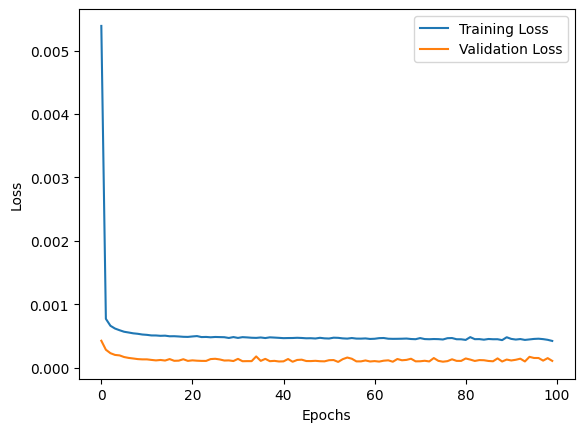

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

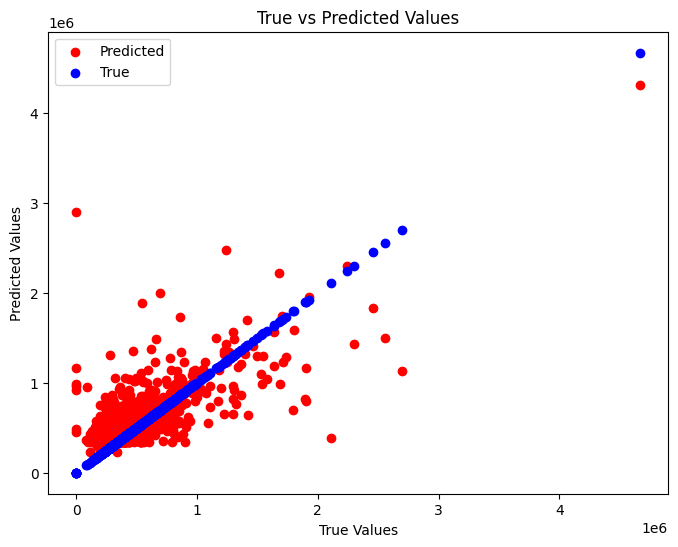

In [ ]:
# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_1)

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='red', label='Predicted')
plt.scatter(y_test_unscaled, y_test_unscaled, color='blue', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### 7. new optimazer

In [ ]:
model_2 = Sequential()

# Add the first hidden layer with 40 neurons and ReLU activation function
model_2.add(Dense(40, activation='relu', input_shape=(X_train.shape[1],)))

# Add the second hidden layer with 30 neurons and ReLU activation function
model_2.add(Dense(25, activation='relu'))

# Add the third hidden layer with 10 neurons and ReLU activation function
model_2.add(Dense(10, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 40)                640       
                                                                 
 dense_41 (Dense)            (None, 25)                1025      
                                                                 
 dense_42 (Dense)            (None, 10)                260       
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1936 (7.56 KB)
Trainable params: 1936 (7.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with stochastic gradient descent optimizer and mean square error loss
model_2.compile(optimizer ='sgd',loss = 'mae')

history = model_2.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=50)

Epoch 1/150
59/59 [==============================] - 1s 9ms/step - loss: 0.0413 - val_loss: 0.0226
Epoch 2/150
59/59 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.0165
Epoch 3/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.0142
Epoch 4/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0142 - val_loss: 0.0129
Epoch 5/150
59/59 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.0110
Epoch 6/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0114 - val_loss: 0.0102
Epoch 7/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0093
Epoch 8/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.0089
Epoch 9/150
59/59 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.0088
Epoch 10/150
59/59 [==============================] - 0s 7ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 11/

29/29 [==============================] - 0s 1ms/step
loss 0.006731478497385979 r2score 0.35335789079527735


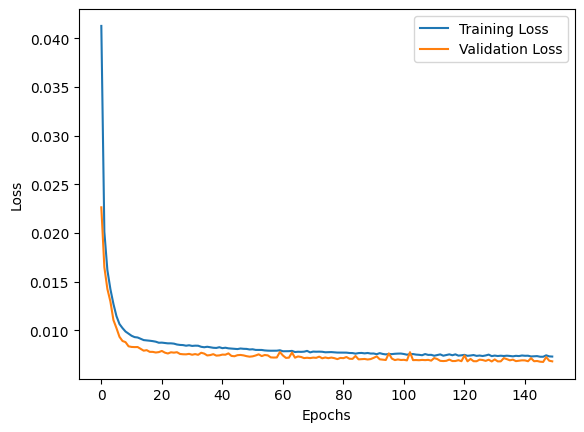

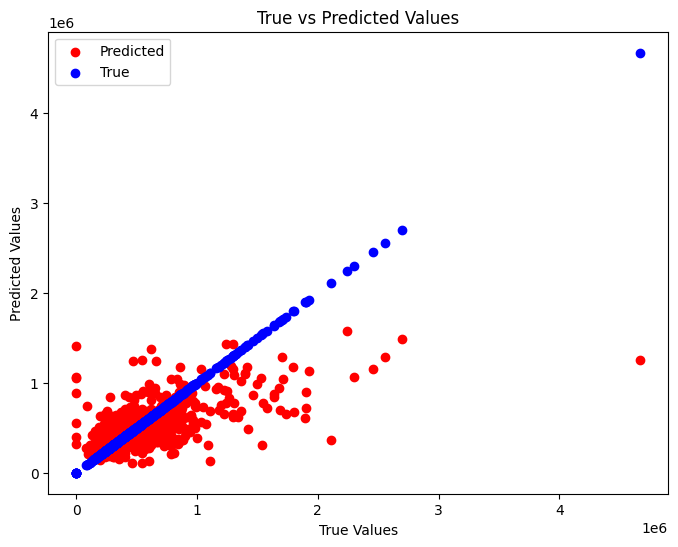

In [ ]:
#Evaluate the model
loss = model_2.evaluate(X_test , y_test)
y_pred_1 = model_2.predict(X_test)
rscore_1 = r2_score(y_test, y_pred_1)

print("loss", loss,"r2score", rscore_1)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_1)

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test_unscaled, y_pred_unscaled, color='red', label='Predicted')
plt.scatter(y_test_unscaled, y_test_unscaled, color='blue', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### 8. evaluate

In [ ]:
np.random.seed(53)
random_row = np.random.choice(X_test.shape[0], size=5, replace=False)
test2 = X_test[random_row]
label_test2 = y_test[random_row]
y_hat2 = model_1.predict(test2)

y_test2_unscaled = scaler_2.inverse_transform(label_test2)
y_pred2_unscaled = scaler_2.inverse_transform(y_hat2)

delta = ((y_test2_unscaled-y_pred2_unscaled)/y_test2_unscaled)
delta = np.vstack(("% of errore", delta))
print(delta, "\n")

y_test2_unscaled , y_pred2_unscaled = arrays_with_names = np.vstack(("prediction", y_test2_unscaled)), np.vstack(("label", y_pred2_unscaled))
array = np.hstack((y_test2_unscaled , y_pred2_unscaled))
print(array)

1/1 [==============================] - 0s 46ms/step
[['% of errore']
 ['-0.16194145683453237']
 ['-0.12129533226976097']
 ['-0.2678764607679466']
 ['0.37369647749510765']
 ['-0.6660032762096776']] 

[['prediction' 'label']
 ['695000.0' '807549.3']
 ['308830.769231' '346290.5']
 ['599000.0' '759458.0']
 ['2555000.0' '1600205.5']
 ['247999.99999999997' '413168.8']]


## 5th Q

### 1.load dataset and spilt

In [201]:
iris = datasets.load_iris()
X = iris.data
y = (iris.target)
y = y[:,None]

np.random.seed(53)
random_row = np.random.choice(X.shape[0], size=5, replace=False)
X2 = X[random_row]
y2 = y[random_row]
data = np.hstack((X2, y2))
data = pd.DataFrame(data)
new_column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data.columns = new_column_names
data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.4,2.9,1.4,0.2,0.0
1,5.1,3.3,1.7,0.5,0.0
2,7.7,2.6,6.9,2.3,2.0
3,5.5,2.3,4.0,1.3,1.0
4,6.7,3.1,4.7,1.5,1.0


In [202]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)
print("#train = ", y_train.shape)
print("#test = ", y_test.shape)

#train =  (120, 1)
#test =  (30, 1)


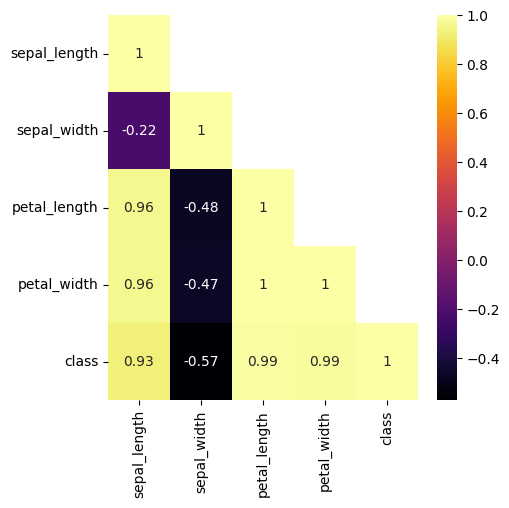

In [140]:
plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, cmap='inferno', mask=np.triu(data.corr(), k=1))
plt.show()

visualize relationships between features

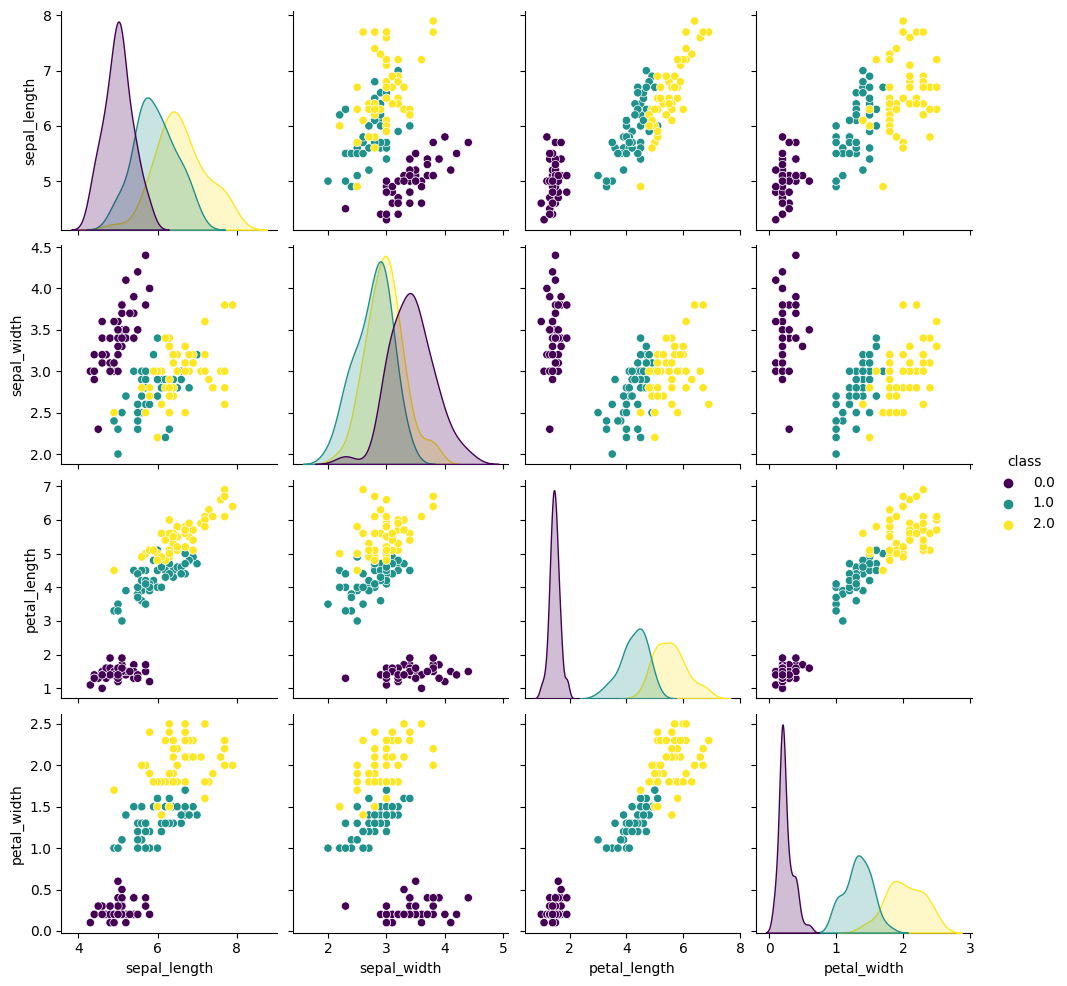

In [141]:
# Explore the dataset
data = np.hstack((X, y))
data = pd.DataFrame(data)
new_column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data.columns = new_column_names
sns.pairplot(data, hue='class', palette='viridis')
plt.show()

### 2.train

####  RBF

In [ ]:
model = SVC(kernel='rbf', random_state=53)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=53)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.93


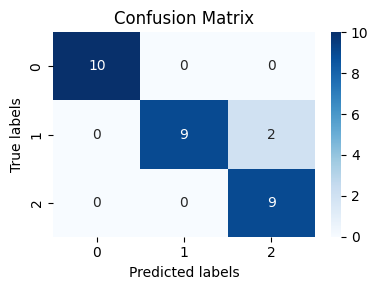

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.82      0.90        11
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### logistic regresion

In [ ]:
model_lr = linear_model.LogisticRegression(random_state=4)
model_lr.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred2 = model_lr.predict(X_test)

# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy2:.2f}')

Accuracy: 0.93


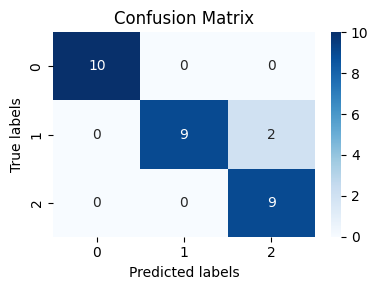

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.82      0.90        11
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred2)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

#### MLP

In [ ]:
# Create and train the MLPClassifier model
model_MLP = MLPClassifier(hidden_layer_sizes=(15, 5), max_iter=1000, random_state=53)
model_MLP.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(15, 5), max_iter=1000, random_state=53)

In [ ]:
# Make predictions on the test set
y_pred3 = model_MLP.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


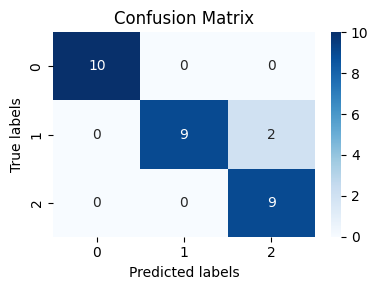

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.82      0.90        11
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred3)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred3))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.90


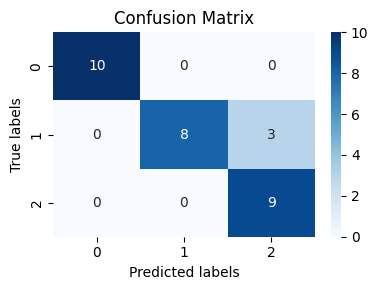

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.73      0.84        11
           2       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



In [ ]:
# Create and train the MLPClassifier model
model_MLP2 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=53)
model_MLP2.fit(X_train, y_train)

# Make predictions on the test set
y_pred4 = model_MLP2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred4)
print(f'Accuracy: {accuracy:.2f}')

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred4)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(4, 3))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred4))

### MLP from scrach

In [172]:
class MLP():

    def __init__(self,X,Y,X_val,Y_val,L=1,N_l=128):
        self.X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        self.Y = np.squeeze(np.eye(10)[Y.astype(np.int).reshape(-1)])
        self.X_val = np.concatenate((X_val,np.ones((X_val.shape[0],1))),axis=1)
        self.Y_val = np.squeeze(np.eye(10)[Y_val.astype(np.int).reshape(-1)])
        self.L = L  #neurons-per-layer
        self.N_l = N_l  #hidden layers
        self.n_samples = self.X.shape[0]
        self.layer_sizes =np.array([self.X.shape[1]]+[N_l]*L+[self.Y.shape[1]])
        self.__init_weights()
        self.train_loss = list()
        self.train_acc = list()
        self.val_loss = list()
        self.val_acc = list()
        self.train_time = list()
        self.tot_time = list()
        self.metrics = [self.train_loss,self.train_acc,self.val_loss,self.val_acc,self.train_time,self.tot_time]

    def __sigmoid(self,x):
        # VCompute the sigmoid
        return 1./(1.+np.exp(-x))

    def __softmax(self,x):
        # Compute softmax along the rows of the input
        exponent = np.exp(x)
        return exponent/exponent.sum(axis=1,keepdims=True)

    def __loss(self,y_pred,y):
        # Compute the loss along the rows, averaging along the number of samples
        return ((-np.log(y_pred))*y).sum(axis=1).mean()

    def __accuracy(self,y_pred,y):
        # Compute the accuracy along the rows, averaging along the number of samples
        return np.all(y_pred==y,axis=1).mean()

    def __sigmoid_prime(self,h):
        # Compute the derivative of sigmoid where h=sigmoid(x)
        return h*(1-h)

    def __to_categorical(self,x):
        # Transform probabilities into categorical predictions row-wise, by simply taking the max probability
        categorical = np.zeros((x.shape[0],self.Y.shape[1]))
        categorical[np.arange(x.shape[0]),x.argmax(axis=1)] = 1
        return categorical

    def __init_weights(self):
        # Initialize the weights of the network given the sizes of the layers
        self.weights = list()
        for i in range(self.layer_sizes.shape[0]-1):
            self.weights.append(np.random.uniform(-1,1,size=[self.layer_sizes[i],self.layer_sizes[i+1]]))
        self.weights = np.asarray(self.weights)

    def __init_layers(self,batch_size):
        # Initialize and allocate arrays for the hidden layer activations
        self.__h = [np.empty((batch_size,layer)) for layer in self.layer_sizes]

    def __feed_forward(self,batch):
        # Perform a forward pass of `batch` samples (N_samples x N_features)
        h_l = batch
        self.__h[0] = h_l
        for i,weights in enumerate(self.weights):
            h_l = self.__sigmoid(h_l.dot(weights))
            self.__h[i+1]=h_l
        self.__out = self.__softmax(self.__h[-1])

    def __back_prop(self,batch_y):
        # Update the weights of the network through back-propagation
        delta_t = (self.__out - batch_y)*self.__sigmoid_prime(self.__h[-1])
        for i in range(1,len(self.weights)+1):
            self.weights[-i]-=self.lr*(self.__h[-i-1].T.dot(delta_t))/self.batch_size
            delta_t = self.__sigmoid_prime(self.__h[-i-1])*(delta_t.dot(self.weights[-i].T))

    def predict(self,X):
        # Generate a categorical, one-hot, prediction given an input X
        X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
        self.__init_layers(X.shape[0])
        self.__feed_forward(X)
        return self.__to_categorical(self.__out)

    def evaluate(self,X,Y):
        # Evaluate the performance (accuracy) predicting on X with true labels Y
        prediction = self.predict(X)
        return self.__accuracy(prediction,Y)

    def train(self,batch_size=8,epochs=25,lr=1.0):
        # Train the model with a given batch size, epochs, and learning rate. Store and print relevant metrics.
        self.lr = lr
        self.batch_size=batch_size
        for epoch in range(epochs):
            start = time.time()

            self.__init_layers(self.batch_size)
            shuffle = np.random.permutation(self.n_samples)
            train_loss = 0
            train_acc = 0
            X_batches = np.array_split(self.X[shuffle],self.n_samples/self.batch_size)
            Y_batches = np.array_split(self.Y[shuffle],self.n_samples/self.batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.__feed_forward(batch_x)
                train_loss += self.__loss(self.__out,batch_y)
                train_acc += self.__accuracy(self.__to_categorical(self.__out),batch_y)
                self.__back_prop(batch_y)

            train_loss = (train_loss/len(X_batches))
            train_acc = (train_acc/len(X_batches))
            self.train_loss.append(train_loss)
            self.train_acc.append(train_acc)

            train_time = round(time.time()-start,3)
            self.train_time.append(train_time)

            self.__init_layers(self.X_val.shape[0])
            self.__feed_forward(self.X_val)
            val_loss = self.__loss(self.__out,self.Y_val)
            val_acc = self.__accuracy(self.__to_categorical(self.__out),self.Y_val)
            self.val_loss.append(val_loss)
            self.val_acc.append(val_acc)

            tot_time = round(time.time()-start,3)
            self.tot_time.append(tot_time)

            print(f"Epoch {epoch+1}: loss = {train_loss.round(3)} | acc = {train_acc.round(3)} | val_loss = {val_loss.round(3)} | val_acc = {val_acc.round(3)} | train_time = {train_time} | tot_time = {tot_time}")


In [173]:
model = MLP(X_train, y_train, X_test, y_test, L=1, N_l=12)
model.train(batch_size=30,epochs=50,lr=1.0)

Epoch 1: loss = 2.216 | acc = 0.217 | val_loss = 2.071 | val_acc = 0.633 | train_time = 0.003 | tot_time = 0.003
Epoch 2: loss = 2.013 | acc = 0.675 | val_loss = 1.939 | val_acc = 0.633 | train_time = 0.002 | tot_time = 0.003
Epoch 3: loss = 1.907 | acc = 0.675 | val_loss = 1.866 | val_acc = 0.433 | train_time = 0.002 | tot_time = 0.002
Epoch 4: loss = 1.847 | acc = 0.492 | val_loss = 1.824 | val_acc = 0.567 | train_time = 0.001 | tot_time = 0.002
Epoch 5: loss = 1.812 | acc = 0.592 | val_loss = 1.798 | val_acc = 0.567 | train_time = 0.001 | tot_time = 0.001
Epoch 6: loss = 1.79 | acc = 0.55 | val_loss = 1.782 | val_acc = 0.667 | train_time = 0.001 | tot_time = 0.001
Epoch 7: loss = 1.776 | acc = 0.542 | val_loss = 1.77 | val_acc = 0.7 | train_time = 0.001 | tot_time = 0.001
Epoch 8: loss = 1.766 | acc = 0.65 | val_loss = 1.762 | val_acc = 0.7 | train_time = 0.004 | tot_time = 0.004
Epoch 9: loss = 1.759 | acc = 0.65 | val_loss = 1.756 | val_acc = 0.7 | train_time = 0.002 | tot_time = 

<ipython-input-172-25a3d5f32ffb>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.Y = np.squeeze(np.eye(10)[Y.astype(np.int).reshape(-1)])
<ipython-input-172-25a3d5f32ffb>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
De

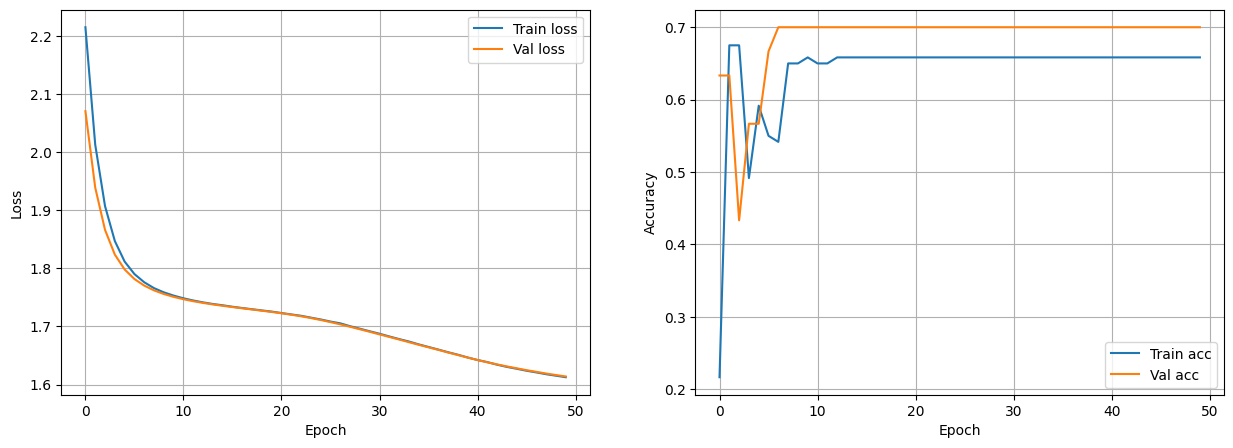

In [174]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(model.train_loss,label="Train loss")
ax[0].plot(model.val_loss,label="Val loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()

ax[1].plot(model.train_acc,label="Train acc")
ax[1].plot(model.val_acc,label="Val acc")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].grid()

### Logistic Regression from scratch

In [203]:

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1/num_samples) * np.dot(X.T, (predictions - y))
            db = (1/num_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return (predictions > 0.5).astype(int)



In [207]:
y = (iris.target)

In [208]:
# Generate some synthetic data for testing
np.random.seed(53)
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


In [209]:
# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, predictions)
lr_precision = precision_score(y_test, predictions, average='weighted')
lr_recall = recall_score(y_test, predictions, average='weighted')
lr_f1 = f1_score(y_test, predictions, average='weighted')

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")

Logistic Regression Metrics:
Accuracy: 0.3667
Precision: 0.1344
Recall: 0.3667
F1 Score: 0.1967


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
